![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)

# **Regularization in PyTorch - Part 1**
### **First we train a CNN on the Fashion-MNIST Dataset usng NO Regularization Methods**

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/CleanShot%202020-12-02%20at%204.01.54%402x.png)
---



---


In this lesson, we first learn to create a **simple Convolutional Neural Network model** in PyTorch and train it to **classify images in the Fashion-MNIST Dataset**, without the use of any Regularization methods. 
1. Import PyTorch libraries, define our Transformers, Load our dataset and Visualize our images.
2. Build a Simple CNN without Regularization
3. Train Our CNN
3. Take a look at Data Augmentation 



# **Import PyTorch libraries, Define Transfomers and Load & Visualise Dataset**

In [1]:
import torch
import PIL
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
import numpy as np
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

print("GPU available: {}".format(torch.cuda.is_available()))
device = 'cuda' #'cpu' if no GPU available

GPU available: True


### **Our Data Transform**

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, ), (0.5, )) ])

In [3]:
# Load our Training Data and specify what transform to use when loading
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# Load our Test Data and specify what transform to use when loading
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

In [5]:
print(trainset.data.shape)
print(testset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


### **Visualising Our Data**

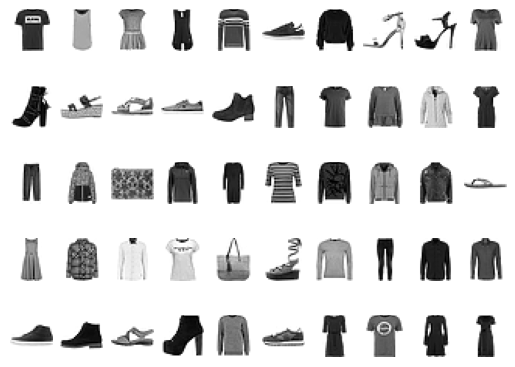

In [6]:
figure = plt.figure()
num_of_images = 50 

for index in range(1, num_of_images + 1):
  plt.subplot(5, 10, index)
  plt.axis('off')
  plt.imshow(trainset.data[index], cmap='gray_r')
  

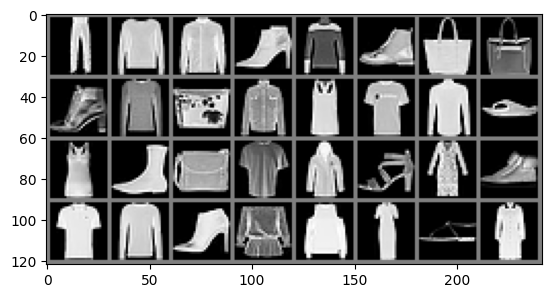

Trouser Pullover  Coat Ankle boot Pullover Ankle boot   Bag   Bag


In [7]:
def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(8)))

# **2. Building and Training Our Simple CNN with No Regularization**

#### **Defining Our Model**

In [8]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, 3)
    self.conv2 = nn.Conv2d(32, 64, 3)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(64 * 12 * 12, 128)
    self.fc2 = nn.Linear(128, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    x = x.reshape(x.shape[0], -1)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x


net = Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

#### **Defining our Loss and Optimisation Functions**

In [9]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# **3. Training Our Model**

In [10]:
epochs = 15

epoch_log = []
loss_log = []
accuracy_log = []

for epoch in range(epochs):  
  print(f'Starting Epoch: {epoch+1}...')

  running_loss = 0.0

  for i, data in enumerate(trainloader, 0):
    inputs, labels = data

    inputs = inputs.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 100 == 99:
      correct = 0
      total = 0

      with torch.no_grad():
        for data in testloader:
          images, labels = data
          images = images.to(device)
          labels = labels.to(device)
                    
          outputs = net(images)

          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

      accuracy = 100 * correct / total
      epoch_num = epoch + 1
      actual_loss = running_loss / 50
      print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i+1)}, Loss: {actual_loss:.3f}, Test Accuracy = {accuracy:.3f}%')
      running_loss = 0.0

  epoch_log.append(epoch_num)
  loss_log.append(actual_loss)
  accuracy_log.append(accuracy)

print('Finished Training')

Starting Epoch: 1...
Epoch: 1, Mini-Batches Completed: 100, Loss: 3.770, Test Accuracy = 67.010%
Epoch: 1, Mini-Batches Completed: 200, Loss: 1.664, Test Accuracy = 71.120%
Epoch: 1, Mini-Batches Completed: 300, Loss: 1.463, Test Accuracy = 72.780%
Epoch: 1, Mini-Batches Completed: 400, Loss: 1.345, Test Accuracy = 73.090%
Epoch: 1, Mini-Batches Completed: 500, Loss: 1.281, Test Accuracy = 76.560%
Epoch: 1, Mini-Batches Completed: 600, Loss: 1.271, Test Accuracy = 73.330%
Epoch: 1, Mini-Batches Completed: 700, Loss: 1.200, Test Accuracy = 77.020%
Epoch: 1, Mini-Batches Completed: 800, Loss: 1.130, Test Accuracy = 77.080%
Epoch: 1, Mini-Batches Completed: 900, Loss: 1.126, Test Accuracy = 79.470%
Epoch: 1, Mini-Batches Completed: 1000, Loss: 1.185, Test Accuracy = 76.720%
Epoch: 1, Mini-Batches Completed: 1100, Loss: 1.159, Test Accuracy = 77.010%
Epoch: 1, Mini-Batches Completed: 1200, Loss: 1.101, Test Accuracy = 80.240%
Epoch: 1, Mini-Batches Completed: 1300, Loss: 1.018, Test Accura

#### **Our Model's Accuracy**

In [11]:
correct = 0 
total = 0

with torch.no_grad():
  for data in testloader:
    images, labels = data
    images = images.to(device)
    labels = labels.to(device)
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.4}%')

Accuracy of the network on the 10000 test images: 91.35%


#### **Our Training Plots**

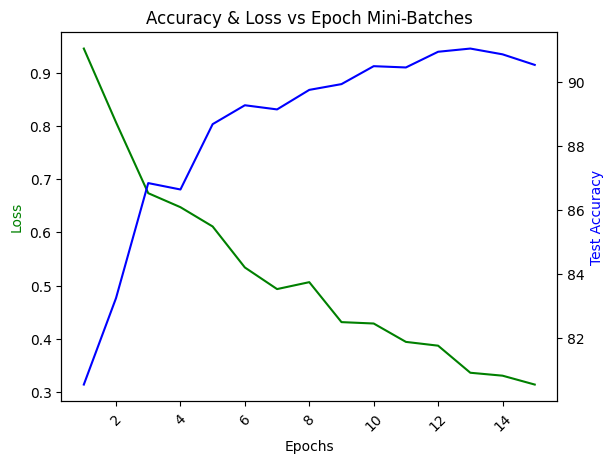

In [12]:
fig, ax1 = plt.subplots()

plt.title("Accuracy & Loss vs Epoch Mini-Batches")
plt.xticks(rotation=45)

ax2 = ax1.twinx()

ax1.plot(epoch_log, loss_log, 'g-')
ax2.plot(epoch_log, accuracy_log, 'b-')

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Test Accuracy', color='b')

plt.show()

#### **Saving Our Model's Weights**

In [13]:
PATH = './fashion_mnist_cnn_net.pth'
torch.save(net.state_dict(), PATH)

# **4. Data Augumentation**

To introduce Data Augmentation to our training data we simply create new Transform functions.

**Recall our previous transformation function**

```transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, ), (0.5, )) ])```

### **We are going to firstly demonstrate how Data Augmentation Affects Our Images**

In [14]:
data_aug_transform = transforms.Compose([
    transforms.RandomAffine(degrees=10, translate=(0.05,0.05), shear=5), 
    transforms.ColorJitter(hue=.05, saturation=.05),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15, interpolation=PIL.Image.BILINEAR),
    transforms.Grayscale(num_output_channels=1)
])

#### **Perform the Data Augmentatin on a Single Image using the function below to Visualize the effects**

In [15]:
def showAugmentations(image, augmentations=6):
  fig = figure()
  for i in range(augmentations):
    a = fig.add_subplot(1,augmentations,i+1)
    img = data_aug_transform(image)
    imshow(img ,cmap='Greys_r')
    axis('off')

(-0.5, 27.5, 27.5, -0.5)

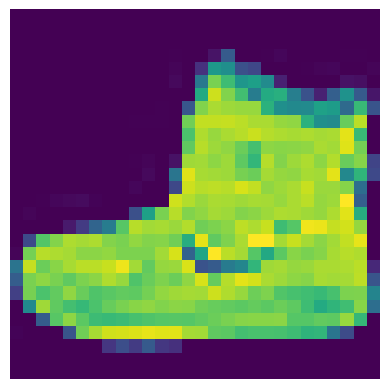

In [21]:
image = trainset.data[0].numpy()

img_pil = PIL.Image.fromarray(image)

plt.imshow(img_pil)
plt.axis('off')